# Gráfico Natalino com Matplotlib
---
*Elaborado por Nayla Chagas. Baseado no artigo [How to draw a 3D Christmas Tree with Matplotlib](https://medium.com/analytics-vidhya/how-to-draw-a-3d-christmas-tree-with-matplotlib-aabb9bc27864) e na documentação oficial da biblioteca [Matplotlib](https://matplotlib.org/stable/users/explain/animations/animations.html).*

É véspera de Natal, eu sei, mas que tal fazer um projetinho bacana pra distrair a família assim que perguntarem a data prevista da sua colação de grau?

## Montando a árvore

Para dar início à nossa artimanha matemática, precisamos importar algumas bibliotecas básicas: Math e Matplotlib. A primeira vai nos ajudar a montar uma árvore matematicamente consistente, já a segunda, cuidará de toda a parte visual do nosso gráfico e foi dividida em 3 coleções: pyplot, mplot3d e animation.

In [228]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation


Após a importação das bibliotecas e ferramentas, vamos setar nossos conjuntos de dados.

Nossa árvore de natal nada mais é do que uma espiral cônica e cada ponto no gráfico tem que colaborar na reprodução desse formato. Utilizaremos as funções Seno e Cosseno da biblioteca Math. Essas funções nos ajudam a gerar um círculo centrado na origem do nosso espaço, assim, brincando um pouquinho com elas, podemos diminuir o raio desse círculo sem fechá-lo, gerando uma espiral cônica.

O faremos da seguinte forma:



In [226]:
k=300 # O número de pontos da nossa árvore
Z = [i for i in range(k)] # O vetor com as coordenadas Z, ou seja, a altura de cada ponto da nossa árvore
X = [math.cos(i/5)*(k-i) for i in range(k)] # olha aqui a biblioteca Math, estamos gerando com ela a impressão de curvatura na posição x de cada ponto do nosso gráfico
Y = [math.sin(i/5)*(k-i) for i in range(k)] # a mesma lógica da última variável, mas para o eixo x


z2 = [i+10 for i in range(k)] #essa é uma ferramenta surpresa que usaremos mais tarde

Os dados estão prontos, vamos ver o que dá pra fazer com essa belezura?

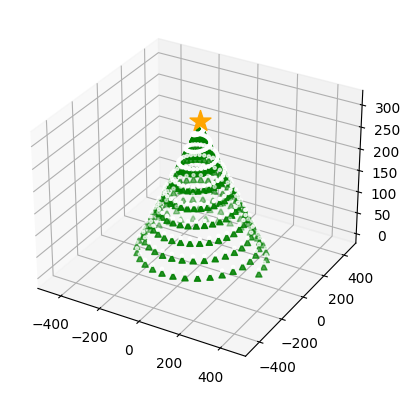

In [227]:
fig = plt.figure() # Aqui geramos nosso espaço, nossos pontos só serão visíveis por conta dessa função
ax = fig.add_subplot(111, projection="3d") # Aqui dizemos ao código que queremos um gráfico tridimencional dentro do espaço que definimos anteriormente

# Essas funções vão ajudar a deixar nossa árvore esteticamente mais bonita, elas limitam a área do plano xy em 1000 pontos cada lado
plt.xlim(-500,500)
plt.ylim(-500,500)

#Agora geramos a base do pinheiro, faremos um gráfico de pontos na cor verde, com triângulos para simular as folhas
ax.scatter(X,Y,Z, c="green", marker="^")

#Jogamos uma nevezinha pra dar aquela temperada, dessa vez, pontinhos brancos
ax.scatter(X,Y,z2, c="white", marker = ".")
#percebeu que usamos nossa ferramenta surpresa? Ela existe só pra neve não sobrepor nossas folhinhas verdes bonitinhas

#E, por fim, colocamos uma estrelinha no topo, um único ponto amarelo em formato de estrela
ax.scatter(0,0,k+10,c="orange", s=250, marker="*")


Saca só o charme! Seu primo pode até ter comprado uma casa à vista, mas uma dessas ele não faz.

## Sinto muito, achei básico



Tá bom, tá bom, se você ainda assim não achou lá essas coisas, vamos dar uma apimentada nessa árvore. Dessa vez, usaremos a ferramenta Animation da biblioteca Matplotlib e uma boa fatia da capacidade de processamento dessa máquina.

*Ainda bem que a gente tá no Colab e não no meu PC*

Vamos gerar enfeites pra essa árvore. Eu sei, muito fofo, né? Se não achou, sinto muito.

Pros nossos enfeites, usaremos mais uma vez a biblioteca Math, mas com uma quantidade de pontos muito menor que a anterior. É natal, não carnaval.

Assim como na vida real, os enfeites precisam seguir o formato da árvore, olha lá as funções Seno e Cosseno de novo.

In [ ]:
X2 = [math.cos(i/5)*(k-i) for i in range(0, k, 3)]
Y2 = [math.sin(i/5)*(k-i) for i in range(0, k, 3)]
Z2 = [i for i in range(0, k, 3)]

Usando a função FuncAnimation, vamos gerar nossos enfeites frame a frame, ou seja, para cada ponto adicionado ao espaço, plotaremos um gráfico diferente.

A função Update recebe cada um dos pontos que foi adicionado ao nosso espaço (fig) e os plota individualmente. Enquanto isso, a FuncAnimation junta todas as imagens geradas pela Update e as adapta para a quantidade de frames e o intervalo de transição entre essas imagens.

Depois disso, salvamos nossa animação como um gif. Agora sim nossa árvore está completa.

In [229]:

ax.scatter(X2[0], Y2[0], Z2[0], c="r", s=20, marker=".")

def update(frame):
    # for each frame, update the data stored on each artist.
    x = X2[:frame]
    y = Y2[:frame]
    z = Z2[:frame]
    # update the scatter plot:
    ax.scatter(x, y, z, c="r", s=20, marker=".")

ani = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=50)
ani.save(filename="/tmp/feliz_natal.gif", writer="pillow")